In [1]:
from keras.utils import set_random_seed
from keras import Sequential
from keras.layers import Conv2D

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
set_random_seed(11)

In [3]:
x_train=np.load('x_train.npy')
y_train=np.load('y_train.npy')
x_val=np.load('x_val.npy')
y_val=np.load('y_val.npy')
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')

In [ ]:
np.save('x_train1', x_train[:,:,:,0])
np.save('x_test1', x_test[:,:,:,0])
np.save('x_val1', x_val[:,:,:,0])

In [9]:
x_train[:,:,:,0].shape

(5321, 150, 150)

In [4]:
def createModel(n_node):
    
    model=Sequential()
    
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(150,150,3)))
    
    
    model.add(Conv2D(50, kernel_size=3, padding='same'))
    
    
    # 출력
    model.add(Conv2D(3,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model


In [5]:
# 메모리 에러남
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

model=createModel(100)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 100)     2800      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 50)      45050     
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 3)       1353      
                                                                 
Total params: 49,203
Trainable params: 49,203
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 검증 데이터에 대한 loss값 2번 연속 개선되지 않으면 학습 중지
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [7]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[stopCB])

Epoch 1/10
167/167 [==============================] - 644s 4s/step - loss: 0.0166 - val_loss: 0.0081
Epoch 2/10
167/167 [==============================] - 626s 4s/step - loss: 0.0084 - val_loss: 0.0080
Epoch 3/10
 30/167 [====>.........................] - ETA: 7:34 - loss: 0.0087

KeyboardInterrupt: 

In [18]:
def test_plt(i):
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.imshow(x_test[i].reshape(150,150,3))
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(132)
    pre_out=model.predict(x_test[i].reshape(-1,150,150,3))
    plt.imshow(pre_out.reshape(150,150,3))
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(133)
    plt.imshow(y_test[i])
    plt.xticks([], [])
    plt.yticks([], [])

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 194ms/step


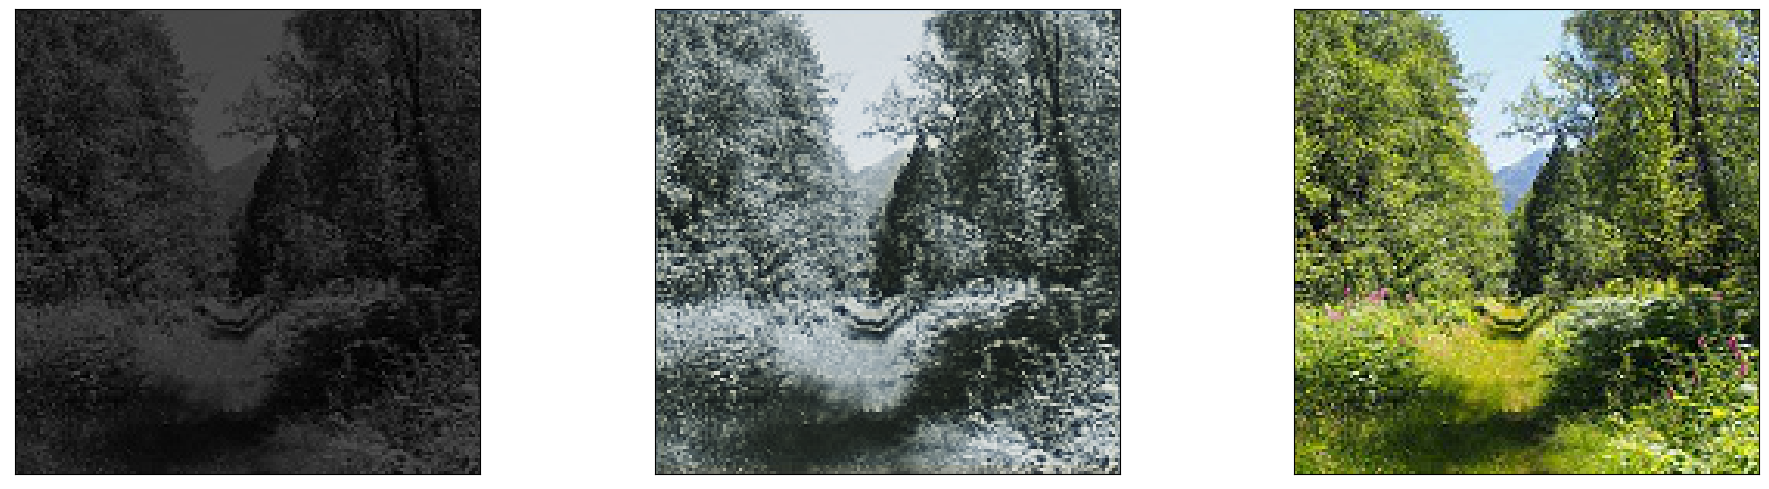

In [19]:
test_plt(100)

In [14]:
from keras.models import save_model
save_model(model, 'model10r.h5')

In [20]:
np.save('x_test.h5', x_test)

In [21]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_test', x_test)
np.save('y_test', y_test)
np.save('x_val', x_val)
np.save('y_val', y_val)
